# Machine Learning - Timeseries Forecasting

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Import

In [2]:
series = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True).squeeze('columns')
series.head()

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

In [3]:
series.shape

(3650,)

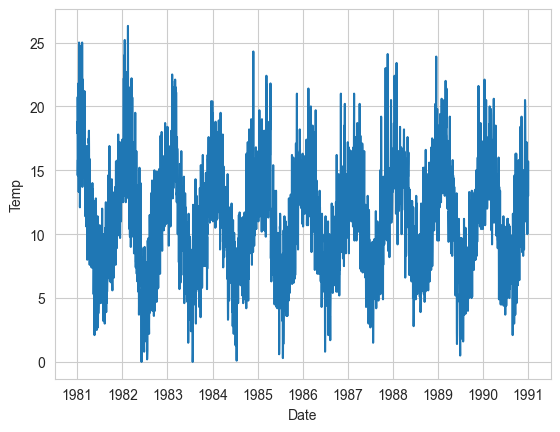

In [4]:
sns.set_style(style='whitegrid')
sns.lineplot(series)
plt.show()

## Feature Engineering

### Date Time Features

In [5]:
df = pd.DataFrame()
df['month'] = [series.index[i].month for i in range(len(series))]
df['day'] = [series.index[i].day for i in range(len(series))]
df['temperature'] = [series[i] for i in range(len(series))]

df.head()

,month,day,temperature
0,1,1,20.7
1,1,2,17.9
2,1,3,18.8
3,1,4,14.6
4,1,5,15.8


### Lag Features

In [6]:
temps = pd.DataFrame(series.values)
temps_df = pd.concat([temps.shift(3), temps.shift(2), temps.shift(1), temps], axis=1)
temps_df.columns = ['t-3', 't-2', 't-1', 't']
temps_df.head()

,t-3,t-2,t-1,t
0,NaN,NaN,NaN,20.7
1,NaN,NaN,20.7,17.9
2,NaN,20.7,17.9,18.8
3,20.7,17.9,18.8,14.6
4,17.9,18.8,14.6,15.8


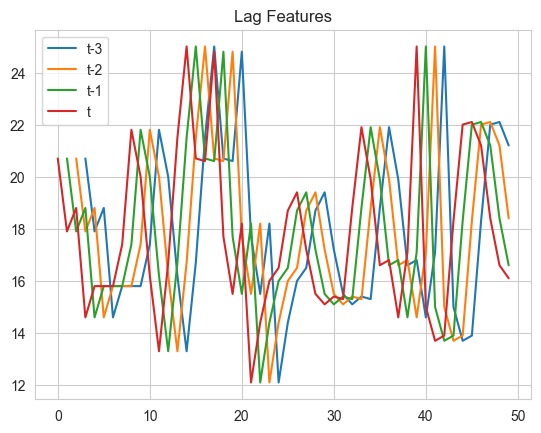

In [7]:
plt.plot(temps_df['t-3'][0:50])
plt.plot(temps_df['t-2'][0:50])
plt.plot(temps_df['t-1'][0:50])
plt.plot(temps_df['t'][0:50])
plt.title('Lag Features')
plt.legend(['t-3', 't-2', 't-1', 't'])

### Rolling Window Statistics

In [8]:
width = 3
shifted = temps.shift(width - 1)
window = shifted.rolling(window=width)
rw_df = pd.concat([window.min(), window.mean(), window.max(), temps], axis=1)
rw_df.columns = ['min', 'mean', 'max', 't']
rw_df.head()

,min,mean,max,t
0,NaN,NaN,NaN,20.7
1,NaN,NaN,NaN,17.9
2,NaN,NaN,NaN,18.8
3,NaN,NaN,NaN,14.6
4,17.9,19.133333,20.7,15.8


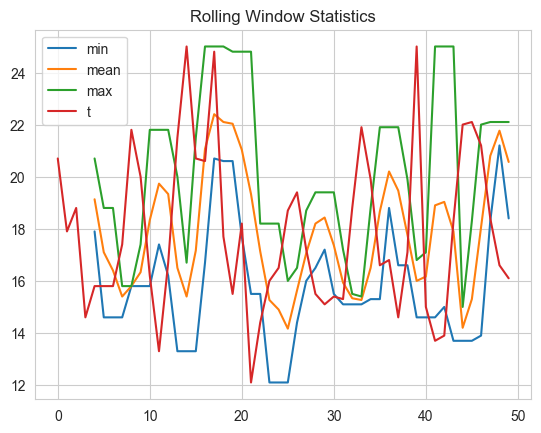

In [9]:
plt.plot(rw_df['min'][0:50])
plt.plot(rw_df['mean'][0:50])
plt.plot(rw_df['max'][0:50])
plt.plot(rw_df['t'][0:50])
plt.title('Rolling Window Statistics')
plt.legend(['min', 'mean', 'max', 't'])

### Expanding Window Statistics

In [10]:
window = temps.expanding()
ew_df = pd.concat([window.min(), window.mean(), window.max(), temps.shift(-1)], axis=1)
ew_df.columns = ['min', 'mean', 'max', 't']
ew_df.head()

,min,mean,max,t
0,20.7,20.700000,20.7,17.9
1,17.9,19.300000,20.7,18.8
2,17.9,19.133333,20.7,14.6
3,14.6,18.000000,20.7,15.8
4,14.6,17.560000,20.7,15.8


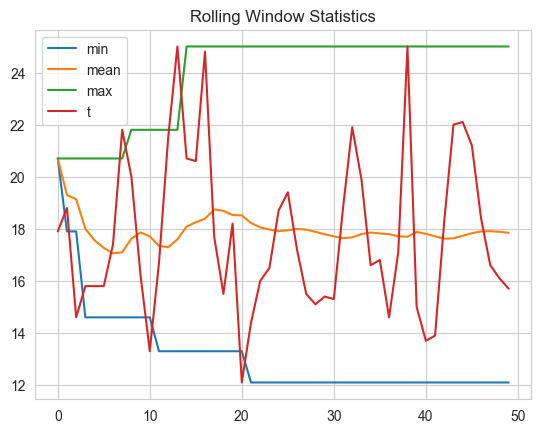

In [11]:
plt.plot(ew_df['min'][0:50])
plt.plot(ew_df['mean'][0:50])
plt.plot(ew_df['max'][0:50])
plt.plot(ew_df['t'][0:50])
plt.title('Rolling Window Statistics')
plt.legend(['min', 'mean', 'max', 't'])